[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/azad-academy/transformer-attention/blob/main/transformer-attention.ipynb)

# Understanding Attention in Transformer Models
#### Author : J. Rafid Siddiqui (jrs@azaditech.com)


## Pre-requisites and Imports

In [ ]:
!pip install spacy
!pip install -U scikit-learn

In [ ]:
# Downloading the NLP Model for word embedding
!python -m spacy download en_core_web_md

### <font color="red">You might have to Restart the Kernal for the downloaded model and the installed packages to be available</font>

In [170]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import math
import matplotlib
import scipy
import spacy
from sklearn.decomposition import PCA
from numpy.linalg import norm 

## Word Embedding

In [3]:
#Sample Text
text = "Author has written the book for advanced readers, there are many difficult words on most pages"

In [21]:
# Generating Vector Embeddings from words in the text
nlp = spacy.load('en_core_web_md')  #loading the model
tokens = nlp(text) # tokenization and embedding

In [640]:
def word_plot(words,vectors,focus_word=None):
    
    colors = np.random.rand(len(words),3)
    
    pca = PCA(n_components=2)
    
    PCA_V = pca.fit_transform(vectors)
    
    fig, ax = plt.subplots(figsize=(11,8))
    
    for i in range(len(PCA_V)):
        x = PCA_V[i][0]
        y = PCA_V[i][1]
        
        ax.scatter(x,y,color=colors[i],alpha=0.5)
        ax.text(x+.01, y+.01, words[i], fontsize=10,fontweight="bold")
        if(focus_word != None and focus_word != words[i]):
            arrow_src_pt = PCA_V[words==focus_word,:][0]
            ax.arrow(arrow_src_pt[0],arrow_src_pt[1],x-arrow_src_pt[0]-0.02,y-arrow_src_pt[1]-0.02,width=.005,facecolor="red")
            
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    

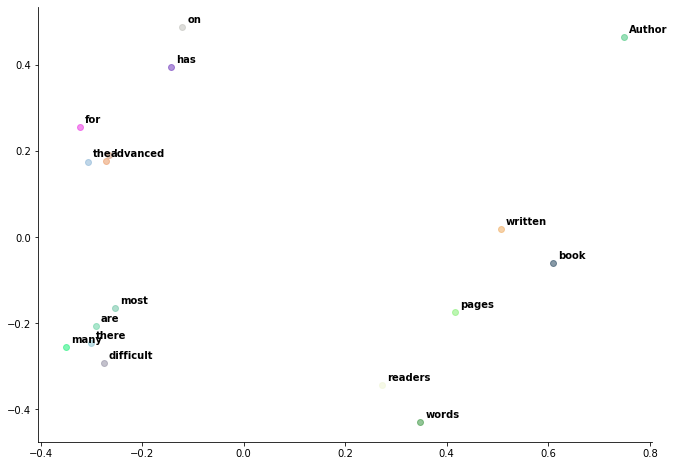

In [633]:
Vecs = []
words = []

for word in tokens:
    Vecs.append(word.vector/word.vector_norm)
    words.append(word.text)
        
# plotting the vector embeddings
word_plot(words,Vecs)

## Position Encoding
![Position-Encoding-Equation](position-embedding-eq.png)

In [444]:
# t = position, d = dimensions, c = constant
def position_encoding(t,d,c):
    
    P = np.zeros(d)
    k = 1
    for i in range(1,d):
        W = 1/c**(2*k/d)
        if(i%2==0):
            P[i] = math.sin(W*t)
        else:
            P[i] = math.cos(W*t)
    return P

In [464]:
num_words = len(tokens)
d = len(tokens[0].vector) # No. of dimensions, keeping it equal to the embedding vector dimension for addition later
c = 10000 #a constant factor representing max frequency

P = np.zeros((num_words,d))
for i in range(num_words): # Generating position encoding vector for each position in the sentence
    P[i] = position_encoding(i+1,d,c)
    

In [472]:
Vp = Vecs + P/norm(P)  #Position encoded embedding

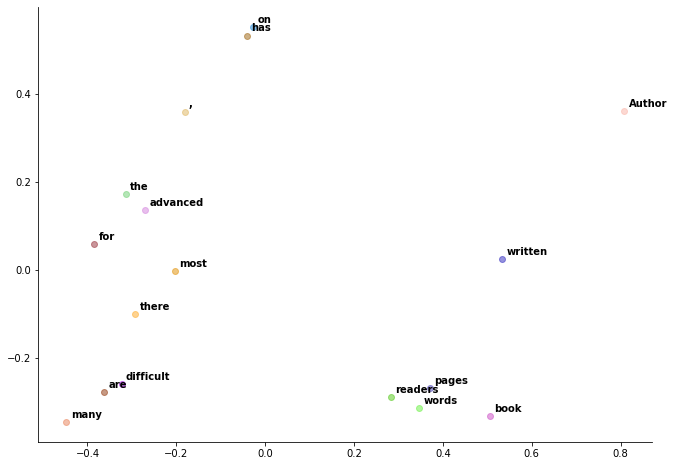

In [634]:
word_plot(words,Vp)

# Self-Attention


![Attention-Equation-Image](attention-equation.png)

In [340]:
def Attention(Q,K,V,d):
    scores = (Q @ np.transpose(K))/d**0.5
    weights = scipy.special.softmax(scores)
    A = weights @ V
    return scores,weights,A

In [522]:
Va = np.zeros((num_words,d))
W = np.zeros((num_words,num_words))
keys = Vp
value = Vp       #keys, queries and values are the same in case of self-attention

for i in range(len(words)):
    query = Vp[i]
    scores,weights, A = Attention(query,keys,value,d) #Attention vector for the query vector
    Va[i] = A
    W[:,i] = weights

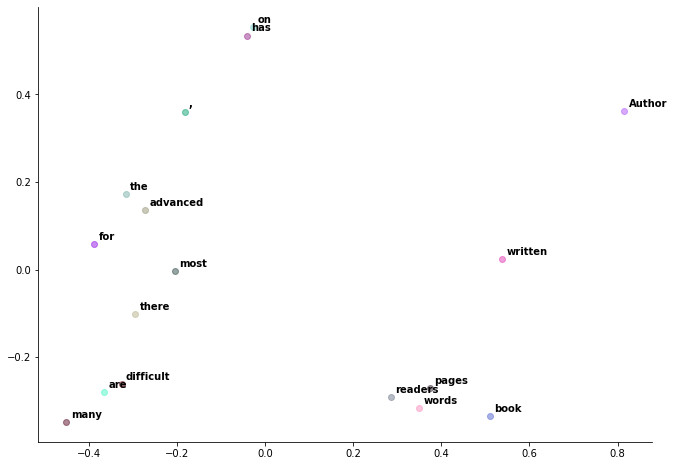

In [635]:
word_plot(words,Vp+Va)

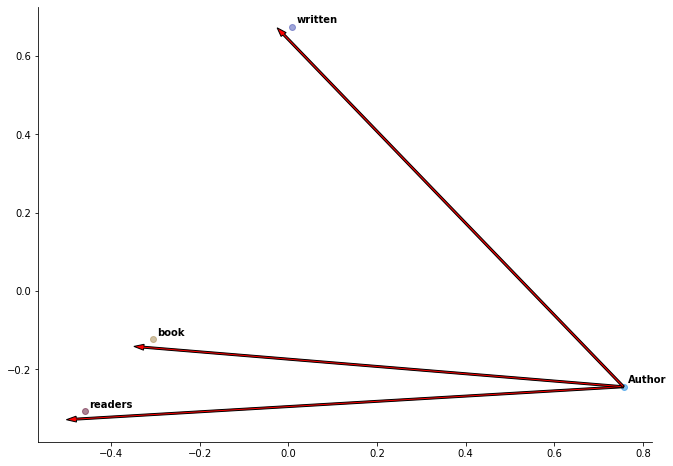

In [641]:
# plotting attention mapping for 'Author'
words = np.array(words)
indices = np.argsort(W[:,0])  
indices = indices[-4:]               #Closest 3 words with highest weights
Vauth = Vp[indices,:]
word_plot(words[indices],Vauth,"Author")

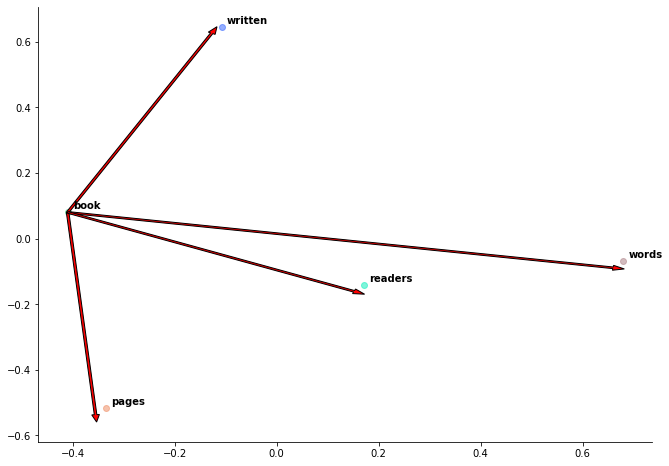

In [645]:
# plotting attention mapping for 'Book'
indices = np.argsort(W[:,4])
indices = indices[-5:]
Vbook = Vp[indices,:]
word_plot(words[indices.astype(int)],Vbook,"book")

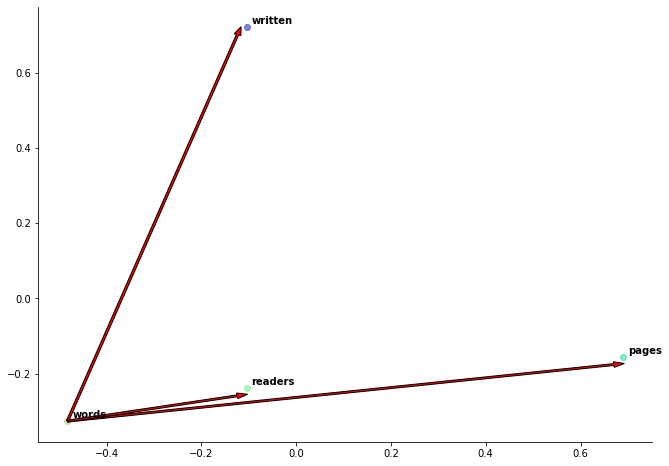

In [644]:
# plotting attention mapping for 'Words'
indices = np.argsort(W[:,13])
indices = indices[-4:]
Vwords = Vp[indices,:]
word_plot(words[indices.astype(int)],Vwords,"words")

## Self-Attention With Learned Weights

In [486]:
# Generating Random numbers as weight matrices for understanding concept (They are learned in NN layers during training)

Q = np.random.rand(d,d)
K = np.random.rand(d,d)
V = np.random.rand(d,d)

In [497]:
# Applying weights to the query, keys and values
queries = Vp @ Q
keys = Vp @ K
values = Vp @ V

In [510]:
# Computing Attention

scores,weights,A = Attention(queries,keys,values,d)

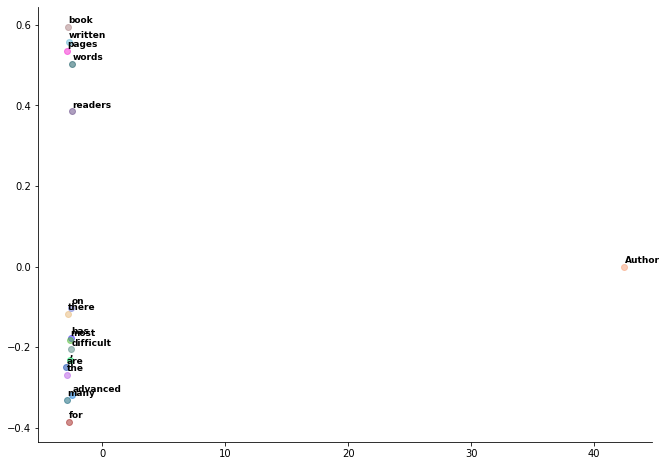

In [515]:
word_plot(words,Vp+A)      #Just showing how it looks, attention weights are random so, no real meaning in the change of output

(1, 300)